In [ ]:
import random as rd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Deeplearning/hr_data.csv")

In [ ]:
df.head()

,SLNO,Candidate Ref,DOJ Extended,Duration to accept offer,Notice period,Offered band,Pecent hike expected in CTC,Percent hike offered in CTC,Percent difference CTC,Joining Bonus,Candidate relocate actual,Gender,Candidate Source,Rex in Yrs,LOB,Location,Age,Status
0,1,2110407,Yes,14,30,E2,-20.79,13.16,42.86,No,No,Female,Agency,7,ERS,Noida,34,Joined
1,2,2112635,No,18,30,E2,50.00,320.00,180.00,No,No,Male,Employee Referral,8,INFRA,Chennai,34,Joined
2,3,2112838,No,3,45,E2,42.84,42.84,0.00,No,No,Male,Agency,4,INFRA,Noida,27,Joined
3,4,2115021,No,26,30,E2,42.84,42.84,0.00,No,No,Male,Employee Referral,4,INFRA,Noida,34,Joined
4,5,2115125,Yes,1,120,E2,42.59,42.59,0.00,No,Yes,Male,Employee Referral,6,INFRA,Noida,34,Joined


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8995 entries, 0 to 8994
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SLNO                         8995 non-null   int64  
 1   Candidate Ref                8995 non-null   int64  
 2   DOJ Extended                 8995 non-null   object 
 3   Duration to accept offer     8995 non-null   int64  
 4   Notice period                8995 non-null   int64  
 5   Offered band                 8995 non-null   object 
 6   Pecent hike expected in CTC  8995 non-null   float64
 7   Percent hike offered in CTC  8995 non-null   float64
 8   Percent difference CTC       8995 non-null   float64
 9   Joining Bonus                8995 non-null   object 
 10  Candidate relocate actual    8995 non-null   object 
 11  Gender                       8995 non-null   object 
 12  Candidate Source             8995 non-null   object 
 13  Rex in Yrs        

In [ ]:
df.nunique()

SLNO                           8995
Candidate Ref                  8995
DOJ Extended                      2
Duration to accept offer        136
Notice period                     7
Offered band                      4
Pecent hike expected in CTC    2082
Percent hike offered in CTC    2601
Percent difference CTC         1148
Joining Bonus                     2
Candidate relocate actual         2
Gender                            2
Candidate Source                  3
Rex in Yrs                       22
LOB                               9
Location                         11
Age                              33
Status                            2
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for name in df.columns:
    df[name] = le.fit_transform(df[name])
    df[name].fillna(int(df[name].median()), inplace=True)

In [ ]:
df.head()

,SLNO,Candidate Ref,DOJ Extended,Duration to accept offer,Notice period,Offered band,Pecent hike expected in CTC,Percent hike offered in CTC,Percent difference CTC,Joining Bonus,Candidate relocate actual,Gender,Candidate Source,Rex in Yrs,LOB,Location,Age,Status
0,0,2,1,14,1,2,36,518,1040,0,0,0,0,7,4,8,14,0
1,1,7,0,18,1,2,1378,2593,1138,0,0,1,2,8,7,2,14,0
2,2,8,0,3,2,2,1218,1618,676,0,0,1,0,4,7,8,7,0
3,3,16,0,26,1,2,1218,1618,676,0,0,1,2,4,7,8,14,0
4,4,17,1,1,6,2,1211,1611,676,0,1,1,2,6,7,8,14,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8995 entries, 0 to 8994
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   SLNO                         8995 non-null   int64
 1   Candidate Ref                8995 non-null   int64
 2   DOJ Extended                 8995 non-null   int64
 3   Duration to accept offer     8995 non-null   int64
 4   Notice period                8995 non-null   int64
 5   Offered band                 8995 non-null   int64
 6   Pecent hike expected in CTC  8995 non-null   int64
 7   Percent hike offered in CTC  8995 non-null   int64
 8   Percent difference CTC       8995 non-null   int64
 9   Joining Bonus                8995 non-null   int64
 10  Candidate relocate actual    8995 non-null   int64
 11  Gender                       8995 non-null   int64
 12  Candidate Source             8995 non-null   int64
 13  Rex in Yrs                   8995 non-null   int

In [ ]:
target = df.pop('Status')
features = df

In [ ]:
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()
features = mm.fit_transform(features)

In [ ]:
from sklearn.model_selection import train_test_split


x,x_test,y,y_test = train_test_split(features,target,test_size=0.2,random_state=42)
x_train,x_val,y_train,y_val = train_test_split(x,y,test_size=0.2, random_state=42)

features.shape

(8995, 17)

In [ ]:
import tensorflow as tf
from tensorflow import keras

model = keras.models.Sequential()
activation ='relu'
model.add(keras.layers.Flatten(input_shape=[17]))
model.add(keras.layers.Dense(400,activation=activation))
model.add(keras.layers.Dense(200,activation=activation))
model.add(keras.layers.Dense(100,activation=activation))
model.add(keras.layers.Dense(50,activation=activation))
model.add(keras.layers.Dense(4,activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 17)                0         
                                                                 
 dense_5 (Dense)             (None, 400)               7200      
                                                                 
 dense_6 (Dense)             (None, 200)               80200     
                                                                 
 dense_7 (Dense)             (None, 100)               20100     
                                                                 
 dense_8 (Dense)             (None, 50)                5050      
                                                                 
 dense_9 (Dense)             (None, 4)                 204       
                                                                 
Total params: 112754 (440.45 KB)
Trainable params: 112

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history = model.fit(x_train,y_train,validation_data = (x_val,y_val),epochs=20 )

Epoch 1/20
180/180 [==============================] - 2s 5ms/step - loss: 0.4672 - accuracy: 0.8120 - val_loss: 0.4248 - val_accuracy: 0.8090
Epoch 2/20
180/180 [==============================] - 1s 6ms/step - loss: 0.4280 - accuracy: 0.8160 - val_loss: 0.4258 - val_accuracy: 0.8104
Epoch 3/20
180/180 [==============================] - 1s 6ms/step - loss: 0.4210 - accuracy: 0.8151 - val_loss: 0.4210 - val_accuracy: 0.8090
Epoch 4/20
180/180 [==============================] - 1s 6ms/step - loss: 0.4172 - accuracy: 0.8172 - val_loss: 0.4152 - val_accuracy: 0.8097
Epoch 5/20
180/180 [==============================] - 1s 6ms/step - loss: 0.4104 - accuracy: 0.8181 - val_loss: 0.4137 - val_accuracy: 0.8174
Epoch 6/20
180/180 [==============================] - 1s 4ms/step - loss: 0.4081 - accuracy: 0.8183 - val_loss: 0.4127 - val_accuracy: 0.8139
Epoch 7/20
180/180 [==============================] - 1s 4ms/step - loss: 0.4056 - accuracy: 0.8211 - val_loss: 0.4112 - val_accuracy: 0.8153
Epoch 

In [ ]:
y_pred=model.predict(x_test)
y_pred=np.argmax(y_pred,axis=1)

57/57 [==============================] - 0s 2ms/step


Accuracy: 0.8087826570316843
precision: 0.8087826570316843
recall: 0.8087826570316843


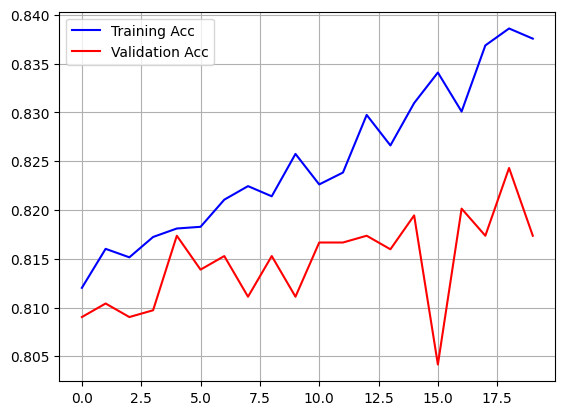

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],c='b')
plt.plot(history.history['val_accuracy'],c='r')
plt.grid()
plt.legend(['Training Acc','Validation Acc'])

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred , average='micro')

print(f"Accuracy: {accuracy}")
print(f"precision: {precision}")
print(f"recall: {recall}")